### Importing data and libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing data sets using the path as string
path = r'C:\Users\loren\Desktop\Career Foundry\2. Data Immersion Course\A6 Advanced Analytics & Dashboard Design\08-2023 Air Quality Analysis\02 Data'
df = pd.read_csv(os.path.join(path, 'AQI_Merged.csv'))

### Clean your data so that it’s ready for analysis

Data was already wrangled and cleaned on previous tasks

### Explore your data visually, looking for variables whose relationship you’d like to test

In [3]:
# Identifying outliers and filtering them
Q1 = df['Density'].quantile(0.25)
Q3 = df['Density'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Density'] >= lower_bound) & (df['Density'] <= upper_bound)]

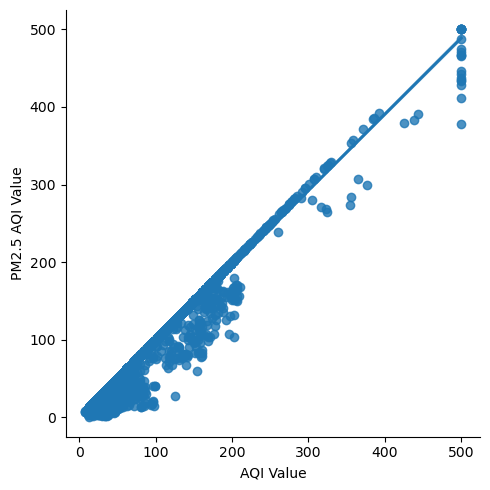

In [4]:
# Creating a scatter plot to check correlation
sns.lmplot(x = 'AQI Value', y = 'PM2.5 AQI Value', data = df_filtered)

### Hypothesis

**Null Hypothesis (H0):** There is no correlation between PM2.5 levels and AQI values. Changes in PM2.5 levels do not lead to significant changes in AQI values.

**Alternative Hypothesis (H1):** There is a correlation between PM2.5 levels and AQI values. Changes in PM2.5 levels are associated with significant changes in AQI values.

In this analysis, we will investigate the relationship between PM2.5 levels, which represent fine particulate matter in the air, and the corresponding Air Quality Index (AQI) values. The null hypothesis assumes no meaningful correlation, while the alternative hypothesis suggests that variations in PM2.5 levels are indicative of changes in air quality as reflected by the AQI.

### Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable

In [5]:
# Reshaping variables into numpy array
X = df['AQI Value'].values.reshape(-1,1)
y = df['PM2.5 AQI Value'].values.reshape(-1,1)

In [6]:
# Checking array
X

array([[ 51.],
       [ 54.],
       [ 31.],
       ...,
       [ 90.],
       [164.],
       [ 56.]])

In [7]:
# Checking array
y

array([[ 51.],
       [ 54.],
       [ 17.],
       ...,
       [ 90.],
       [144.],
       [ 42.]])

### Split the data into two sets: a training set and a test set

In [8]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis

###### 1. Fitting model on the training set

In [9]:
# Creating a regression object
regression = LinearRegression()

In [10]:
# Placing the regression to the test set
regression.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predicting X_test
y_predicted = regression.predict(X_train)

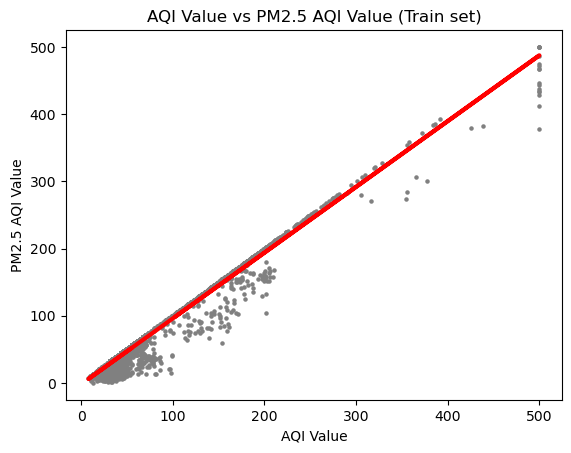

In [12]:
# Creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 5)
plot_test.plot(X_train, y_predicted, color='red', linewidth =3)
plot_test.title('AQI Value vs PM2.5 AQI Value (Train set)')
plot_test.xlabel('AQI Value')
plot_test.ylabel('PM2.5 AQI Value')
plot_test.show()

In [13]:
# Creating objects that contains the model summary statistics
rmse = mean_squared_error(y_train, y_predicted) # This is the mean squared error
r2 = r2_score(y_train, y_predicted) # This is the R2 score

In [14]:
# Printing the model summary statistics. This is where you evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.97894454]]
Mean squared error:  75.88989310147457
R2 score:  0.9609196358735995


##### Linear Fit Interpretation

The linear regression model fits the data very well.

The positive slope of approximately 0.979 indicates a positive relationship between the variables. 

The low mean squared error of 75.89 signifies that the model's predictions are close to the actual data points. 

With an R-squared score of 0.961, around 96.1% of the variability in the dependent variable is explained by the model. 

Overall, this suggests a strong fit, and the model is a reliable representation of the data.

In [15]:
# Creating a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,104.0,99.805871
1,137.0,132.111041
2,38.0,35.195531
3,74.0,70.437535
4,9.0,30.300808
5,52.0,48.900755
6,193.0,186.931935
7,77.0,73.374368
8,23.0,29.321864
9,38.0,46.942866


##### 2. Fitting model on the test set

In [16]:
# Predicting X_train
y_predicted_test = regression.predict(X_test)

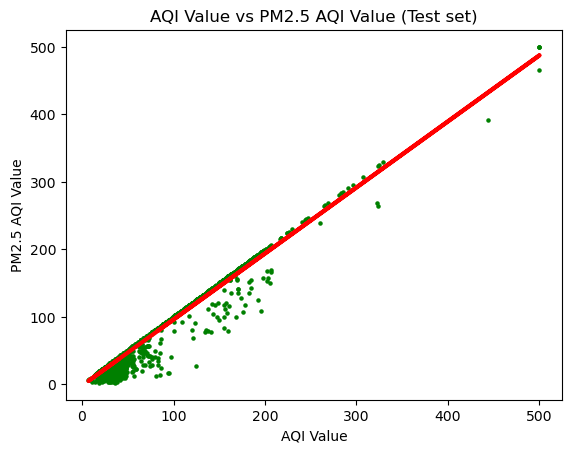

In [17]:
# Creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 5)
plot_test.plot(X_test, y_predicted_test, color='red', linewidth =3)
plot_test.title('AQI Value vs PM2.5 AQI Value (Test set)')
plot_test.xlabel('AQI Value')
plot_test.ylabel('PM2.5 AQI Value')
plot_test.show()

In [18]:
# Creating objects that contains the model summary statistics
rmse = mean_squared_error(y_test, y_predicted_test) # This is the mean squared error
r2 = r2_score(y_test, y_predicted_test) # This is the R2 score

In [19]:
# Printing the model summary statistics. This is where you evaluate the performance of the model
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[0.97894454]]
Mean squared error: 79.27370480110703
R2 score: 0.9564375217255847


##### Linear Fit Assessment

The linear regression demonstrates a favorable fit:

Slope: Around 0.979, implying a positive correlation.

MSE: Approximately 79.27, indicating reasonable prediction accuracy.

R2 Score: About 0.956, suggesting strong model explanation for variance.

In summary, the model fits well, portraying a positive relationship and capable prediction performance, as evidenced by the high R2 score.

In [20]:
# Creating a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted_test.flatten()})
data.head(10)

,Actual,Predicted
0,38.0,36.174476
1,22.0,21.490307
2,58.0,54.774422
3,61.0,57.711256
4,83.0,79.248036
5,121.0,116.447928
6,56.0,52.816533
7,62.0,58.690200
8,20.0,33.237642
9,72.0,68.479646


##### Include any reflections you have on the impact of possible data bias.

Measurement Bias: If the measurements of 'AQI Value' and 'PM2.5 AQI Value' are taken using different instruments or methods in different locations, variations in measurement accuracy can lead to bias. Inaccurate or inconsistent measurements might distort the true relationship between the variables.